<a href="https://colab.research.google.com/github/zeyneb-chiha/Breast_Cancer_Detection/blob/master/DNASeq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
from PIL import Image
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import tensorflow as tf


In [ ]:
human = pd.read_table('/content/drive/My Drive/dnadata/human_data.txt')
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The LabelEncoder encodes a sequence of bases as a sequence of integers.
integer_encoder = LabelEncoder()  
# The OneHotEncoder converts an array of integers to a sparse matrix where 
# each row corresponds to one possible value of each feature.
one_hot_encoder = OneHotEncoder(categories='auto')   
input_features = []

for sequence in human.sequence:
  integer_encoded = integer_encoder.fit_transform(list(sequence))
  integer_encoded = np.array(integer_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
  input_features.append(one_hot_encoded.toarray())

np.set_printoptions(threshold=40)
input_features = np.stack(input_features)
print("Example sequence\n-----------------------")
print('DNA Sequence #1:\n',sequence[0][:10],'...',sequence[0][-10:])
print('One hot encoding of Sequence #1:\n',input_features[0].T)

Example sequence
-----------------------
DNA Sequence #1:
 A ... A
One hot encoding of Sequence #1:
 [[1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]


In [ ]:
input_features.shape

(4380, 207, 4)

In [ ]:
labels = human.iloc[:,1].values                       


In [ ]:

one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(labels).reshape(-1, 1)
input_labels = one_hot_encoder.fit_transform(labels).toarray()

print('Labels:\n',labels.T)
print('One-hot encoded labels:\n',input_labels.T)

Labels:
 [[4 4 3 ... 6 6 6]]
One-hot encoded labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
input_labels.shape

(4380, 7)

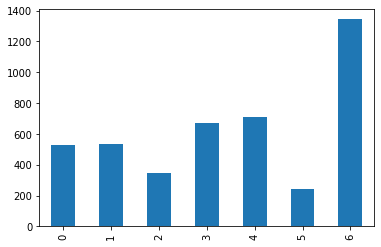

In [ ]:
human['class'].value_counts().sort_index().plot.bar()


In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    input_features, input_labels, test_size=0.25, random_state=42)

In [ ]:
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=12, 
                 input_shape=(train_features.shape[1], 4)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 196, 32)           1568      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 49, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 455       
Total params: 102,439
Trainable params: 102,439
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_features, train_labels, 
        epochs=10,
        verbose=1, 
        validation_data=(test_features,test_labels))


Epoch 1/10
103/103 [==============================] - 1s 7ms/step - loss: 1.8498 - accuracy: 0.2950 - val_loss: 1.8657 - val_accuracy: 0.3205
Epoch 2/10
103/103 [==============================] - 0s 4ms/step - loss: 1.8295 - accuracy: 0.3020 - val_loss: 1.8143 - val_accuracy: 0.3205
Epoch 3/10
103/103 [==============================] - 0s 4ms/step - loss: 1.8345 - accuracy: 0.3020 - val_loss: 1.8263 - val_accuracy: 0.3205
Epoch 4/10
103/103 [==============================] - 0s 4ms/step - loss: 1.8283 - accuracy: 0.3020 - val_loss: 1.8180 - val_accuracy: 0.3205
Epoch 5/10
103/103 [==============================] - 0s 4ms/step - loss: 1.8265 - accuracy: 0.3020 - val_loss: 1.8160 - val_accuracy: 0.3205
Epoch 6/10
103/103 [==============================] - 0s 4ms/step - loss: 1.8246 - accuracy: 0.3020 - val_loss: 1.8306 - val_accuracy: 0.3205
Epoch 7/10
103/103 [==============================] - 0s 4ms/step - loss: 1.8254 - accuracy: 0.3020 - val_loss: 1.8147 - val_accuracy: 0.3205
Epoch 

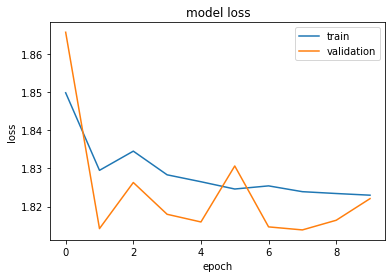

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

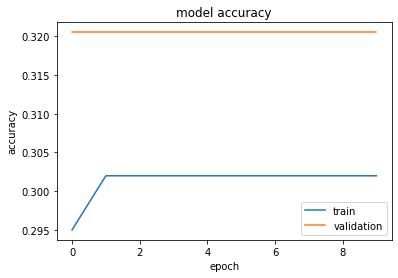

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()